### Challenge 1: Convert the 'date' column to a DateTime object and set it as the index. Drop any unnecessary columns.

In [2]:
import pandas as pd

file_path = "ADA.csv"
df = pd.read_csv(file_path) 

df['date'] = pd.to_datetime(df['date'])
df.set_index('date')

print(df)                                                   # We have 10 columns

df_drop = df.drop(columns=['unix','tradecount', 'symbol'])
print(df_drop)                                              # Now we have 7 columns

               unix       date    symbol     open     high      low    close  \
0     1610496000000 2021-01-13  ADA/USDT  0.28875  0.28906  0.28550  0.28553   
1     1610409600000 2021-01-12  ADA/USDT  0.27563  0.31442  0.26280  0.28888   
2     1610323200000 2021-01-11  ADA/USDT  0.30154  0.30397  0.22880  0.27570   
3     1610236800000 2021-01-10  ADA/USDT  0.33062  0.34120  0.27948  0.30153   
4     1610150400000 2021-01-09  ADA/USDT  0.30392  0.33851  0.29583  0.33062   
...             ...        ...       ...      ...      ...      ...      ...   
998   1524268800000 2018-04-21  ADA/USDT  0.30161  0.30700  0.26509  0.28668   
999   1524182400000 2018-04-20  ADA/USDT  0.27004  0.30442  0.26648  0.30108   
1000  1524096000000 2018-04-19  ADA/USDT  0.26199  0.27500  0.25777  0.27004   
1001  1524009600000 2018-04-18  ADA/USDT  0.24260  0.26460  0.24201  0.26200   
1002  1523923200000 2018-04-17  ADA/USDT  0.25551  0.28800  0.23983  0.24260   

        Volume ADA   Volume USDT  trade

### Challenge 2: Create a line plot showing the trend of 'close' prices over time.

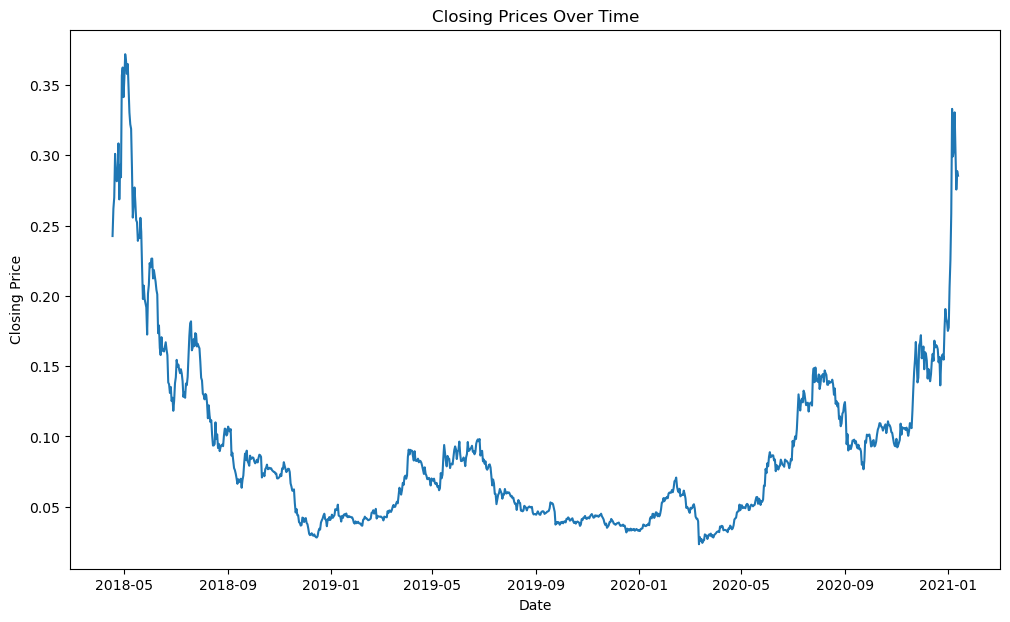

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "ADA.csv"
df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])

df_sorted = df.sort_values(by = 'date',ascending = True)              # Sorting by date         

plt.figure(figsize=(12, 7))
plt.plot(df_sorted['date'], df_sorted['close'])
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=0)
plt.show()

### Challenge 3: Plot a bar chart to compare the average 'Volume ADA' and 'Volume USDT' for each 'symbol'.

<Figure size 1000x600 with 0 Axes>

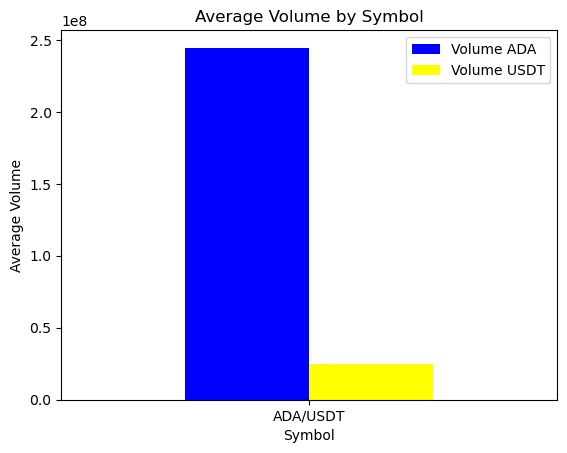

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "ADA.csv"
df = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
df_volume = df.groupby('symbol')[['Volume ADA', 'Volume USDT']].mean()         # Actually, we have only one symbol
df_volume.plot(kind='bar', color=['blue', 'yellow'])
plt.title('Average Volume by Symbol')
plt.xlabel('Symbol')
plt.ylabel('Average Volume')
plt.xticks(rotation = 0)
plt.show()

### Challenge 4: Use Plotly or Matplotlib to create a candlestick chart for a specific 'symbol' on a specific date.

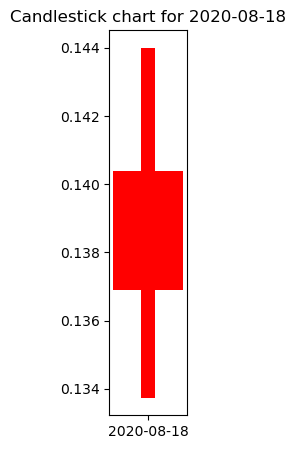

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "ADA.csv"
df = pd.read_csv(file_path)

df['date'] = pd.to_datetime(df['date'])

df['month_year_day'] = df['date'].dt.strftime('%Y-%m-%d')  

chosen_date = df[df['month_year_day'] == '2020-08-18' ]                 # Here we can specify date (for ex. 2020-08-20). I don't use groupby since we have only one symbol

if chosen_date.iloc[0]['close']-chosen_date.iloc[0]['open'] >= 0:        # For bull days we have green, for bear - red
    col1 = 'green'
else:
    col1 = 'red'

plt.figure(figsize=(1, 5))

width = .1
width2 = .02

plt.bar(chosen_date['month_year_day'], chosen_date['close']-chosen_date['open'], width, bottom = chosen_date['open'], color = col1)          # Plotting up prices of the stock 
plt.bar(chosen_date['month_year_day'], chosen_date['high']-chosen_date['close'], width2, bottom = chosen_date['close'], color = col1) 
plt.bar(chosen_date['month_year_day'], chosen_date['low']-chosen_date['open'], width2, bottom = chosen_date['open'], color = col1) 
       
plt.title(f"Candlestick chart for {chosen_date.iloc[0]['month_year_day']}")
  
plt.show() 

### Challenge 5: Calculate and visualize the correlation matrix for the numerical columns in the DataFrame.

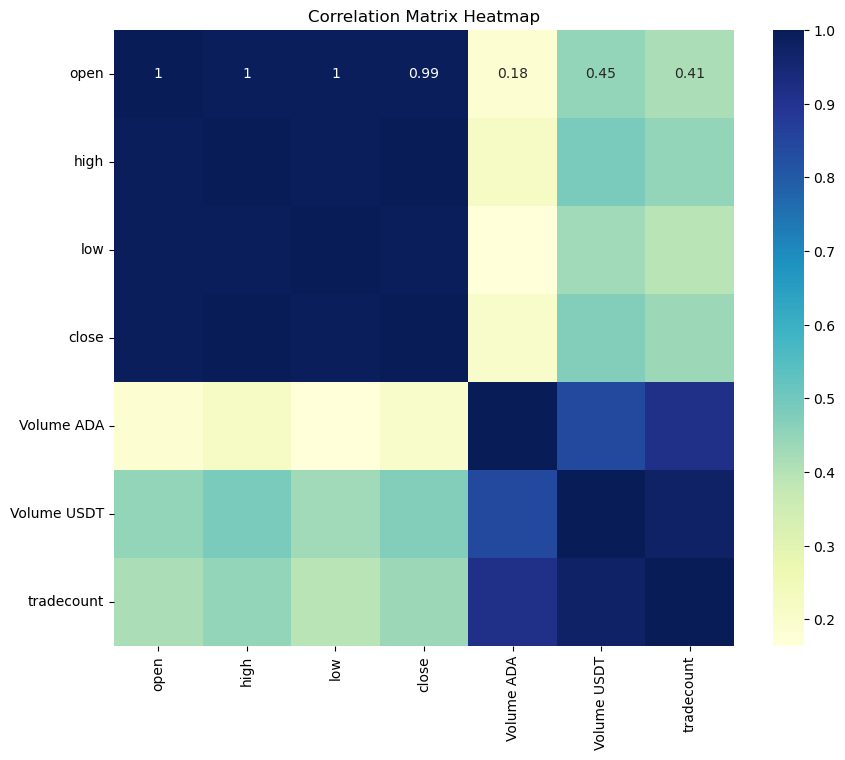

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "ADA.csv"
df = pd.read_csv(file_path)

df['date'] = pd.to_datetime(df['date'])

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns          # Filter out non-numeric columns
numeric_df = df[numeric_columns]

numeric_df_drop = numeric_df.drop(columns=['unix'])                               # I don't want to use 'unix' column also

correlation_matrix = numeric_df_drop.corr()                                       # Calculate the correlation matrix

plt.figure(figsize=(10, 8))                                                       # Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix Heatmap')
plt.show()                                                           

### Challenge 6: Load two CSV files, "data1.csv", and "data2.csv" ( you can use the ones already downloaded or choose other ones ), with the same structure as the provided DataFrame. Then, create line graphs to compare the 'close' prices of both DataFrames over time.

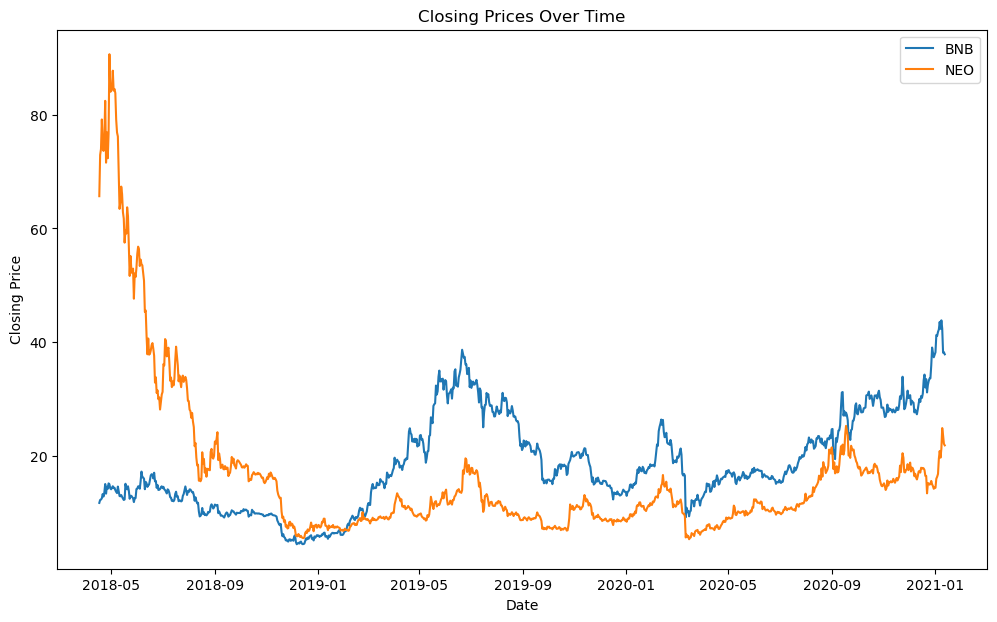

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_1 = "BNB.csv"
df_BNB = pd.read_csv(file_path_1)
file_path_2 = "NEO.csv"
df_NEO = pd.read_csv(file_path_2)

df_BNB['date'] = pd.to_datetime(df['date'])
df_NEO['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(12, 7))
plt.plot(df_BNB['date'], df_BNB['close'], label='BNB')
plt.plot(df_NEO['date'], df_NEO['close'], label='NEO')
plt.legend()
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=0)
plt.show()

### Challenge 7: Load three CSV files, data1.csv, data2.csv, and data3.csv, each with the same structure as the provided DataFrame. Create a pie chart to compare the 'Volume USDT' values for each data frame. The Pie will show the participation of each data frame in the total.

Total volume USDT:  131300360032.94089
BNB volume USDT: 50666578900.51071
NEO volume USDT: 14705929024.531864
XRP volume USDT: 65927852107.89831


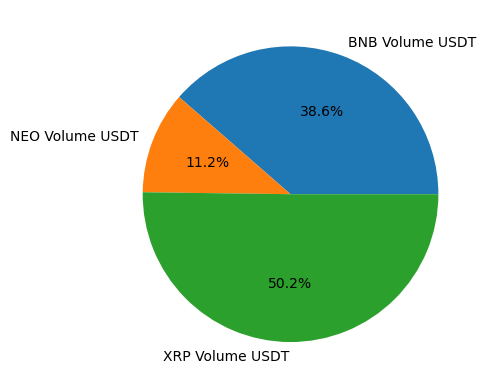

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_1 = "BNB.csv"
df_BNB = pd.read_csv(file_path_1)
file_path_2 = "NEO.csv"
df_NEO = pd.read_csv(file_path_2)
file_path_3 = "XRP.csv"
df_XRP = pd.read_csv(file_path_3)

total_Volume_USDT = df_BNB['Volume USDT'].sum() + df_NEO['Volume USDT'].sum() + df_XRP['Volume USDT'].sum()

print(f"Total volume USDT:  {total_Volume_USDT}")

print(f"BNB volume USDT: {df_BNB['Volume USDT'].sum()}")
print(f"NEO volume USDT: {df_NEO['Volume USDT'].sum()}")
print(f"XRP volume USDT: {df_XRP['Volume USDT'].sum()}")

labels = 'BNB Volume USDT', 'NEO Volume USDT', 'XRP Volume USDT' 
sizes = [df_BNB['Volume USDT'].sum(), df_NEO['Volume USDT'].sum(), df_XRP['Volume USDT'].sum()]

fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct='%1.1f%%')

plt.show()